In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import os
import glob
from scipy.stats import pearsonr, linregress
from scipy.stats import gaussian_kde

Number of data points in each pLDDT bin:
pLDDT Group
<70        16
70-80     103
80-90     242
90-100    189
Name: count, dtype: int64
                 mean       std
pLDDT Group                    
<70          1.670480  0.450001
70-80        1.271799  0.639722
80-90        1.002660  0.630151
90-100       0.581505  0.511484
Pearson Correlation Coefficient: -0.433
P-value: 1.646e-26


/var/folders/6v/7hycfbhs6fg9jp_q0z6h9flm0000gp/T/ipykernel_8275/1515968569.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df.groupby("pLDDT Group")["Ligand RMSD"].agg(["mean", "std"])


(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 [Text(0, -0.5, '−0.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 3.0, '3.0'),
  Text(0, 3.5, '3.5')])

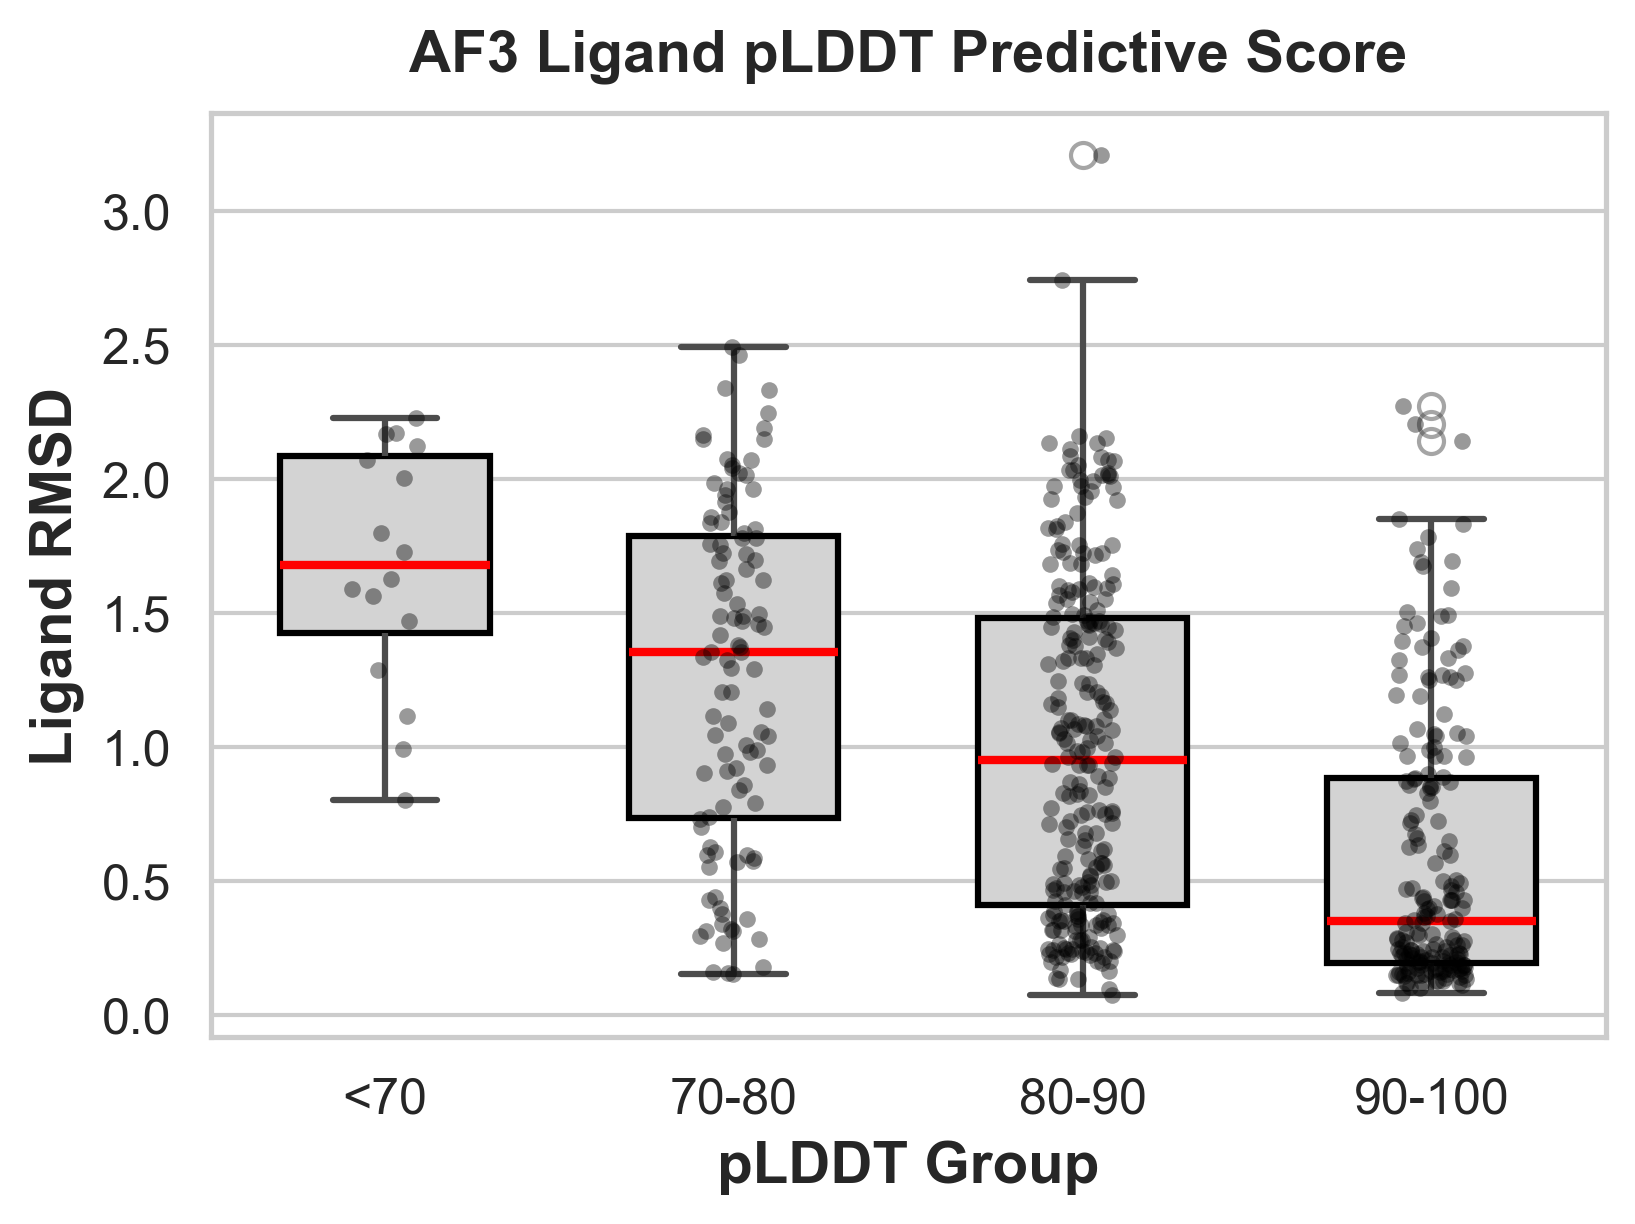

In [75]:
#Load file (Change the file_path to your own xlsx/csv file)
file_path = "/Users/JB/Rotation_bkslab/250203_alphafold3/20241209_mac1.xlsx"
data = pd.read_excel(file_path)

#Define bins and labels (set up appropriate bins for your box plot)
bins = [0, 70, 80, 90, 100]
labels = ["<70", "70-80", "80-90", "90-100"]

# Extract data (14th column is Ligand pLDDT, 13th column is Ligand RMSD)
x = data.iloc[:, 13]  
y = data.iloc[:, 12]

# Create DataFrame
df = pd.DataFrame({"L-pLDDT": x, "Ligand RMSD": y})
df.dropna(inplace=True)

# Assign each pLDDT value to a bin
df["pLDDT Group"] = pd.cut(df["L-pLDDT"], bins=bins, labels=labels, include_lowest=True)

# Count number of data points in each bin
bin_counts = df["pLDDT Group"].value_counts().sort_index()
stats = df.groupby("pLDDT Group")["Ligand RMSD"].agg(["mean", "std"])

# Print results
print("Number of data points in each pLDDT bin:")
print(bin_counts)
print(stats)

# Pearson's
corr_coeff, p_value = pearsonr(df["L-pLDDT"], df["Ligand RMSD"])

# Print correlation results
print(f"Pearson Correlation Coefficient: {corr_coeff:.3f}")
print(f"P-value: {p_value:.3e}")

# Adding aesthetics to the plot
sns.set(style="whitegrid", context="notebook")
plt.figure(figsize=(6, 4), dpi=300)  # High-resolution figure for publication

# Box plots
sns.boxplot(x="pLDDT Group", y="Ligand RMSD", data=df,  
            width=0.6, linewidth=1.5,  
            boxprops={'facecolor': 'lightgray', 'edgecolor': 'black'}, 
            whiskerprops={'linewidth': 1.5}, capprops={'linewidth': 1.5}, 
            medianprops={'color': 'red', 'linewidth': 2}, flierprops={'marker': 'o', 'alpha': 0.5})

# Individual points are overlayed on plots
sns.stripplot(x="pLDDT Group", y="Ligand RMSD", data=df,  
              jitter=True, size=4, color="black", alpha=0.4)

# Axes, labels, etc.
plt.xlabel("pLDDT Group", fontsize=14, fontweight='bold', fontname='Arial')
plt.ylabel("Ligand RMSD", fontsize=14, fontweight='bold', fontname='Arial')
plt.title("AF3 Ligand pLDDT Predictive Score", fontsize=14, fontweight='bold', fontname='Arial', pad=10)
plt.xticks(fontsize=12, fontname='Arial')
plt.yticks(fontsize=12, fontname='Arial')

Number of data points in each pLDDT bin:
pLDDT Group
<70        16
70-80     103
80-90     242
90-100    189
Name: count, dtype: int64
                 mean       std
pLDDT Group                    
<70          1.670480  0.450001
70-80        1.271799  0.639722
80-90        1.002660  0.630151
90-100       0.581505  0.511484
Pearson Correlation Coefficient: -0.433
P-value: 1.646e-26


/var/folders/6v/7hycfbhs6fg9jp_q0z6h9flm0000gp/T/ipykernel_8275/2257588463.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df.groupby("pLDDT Group")["Ligand RMSD"].agg(["mean", "std"])


(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 [Text(0, -0.5, '−0.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 3.0, '3.0'),
  Text(0, 3.5, '3.5')])

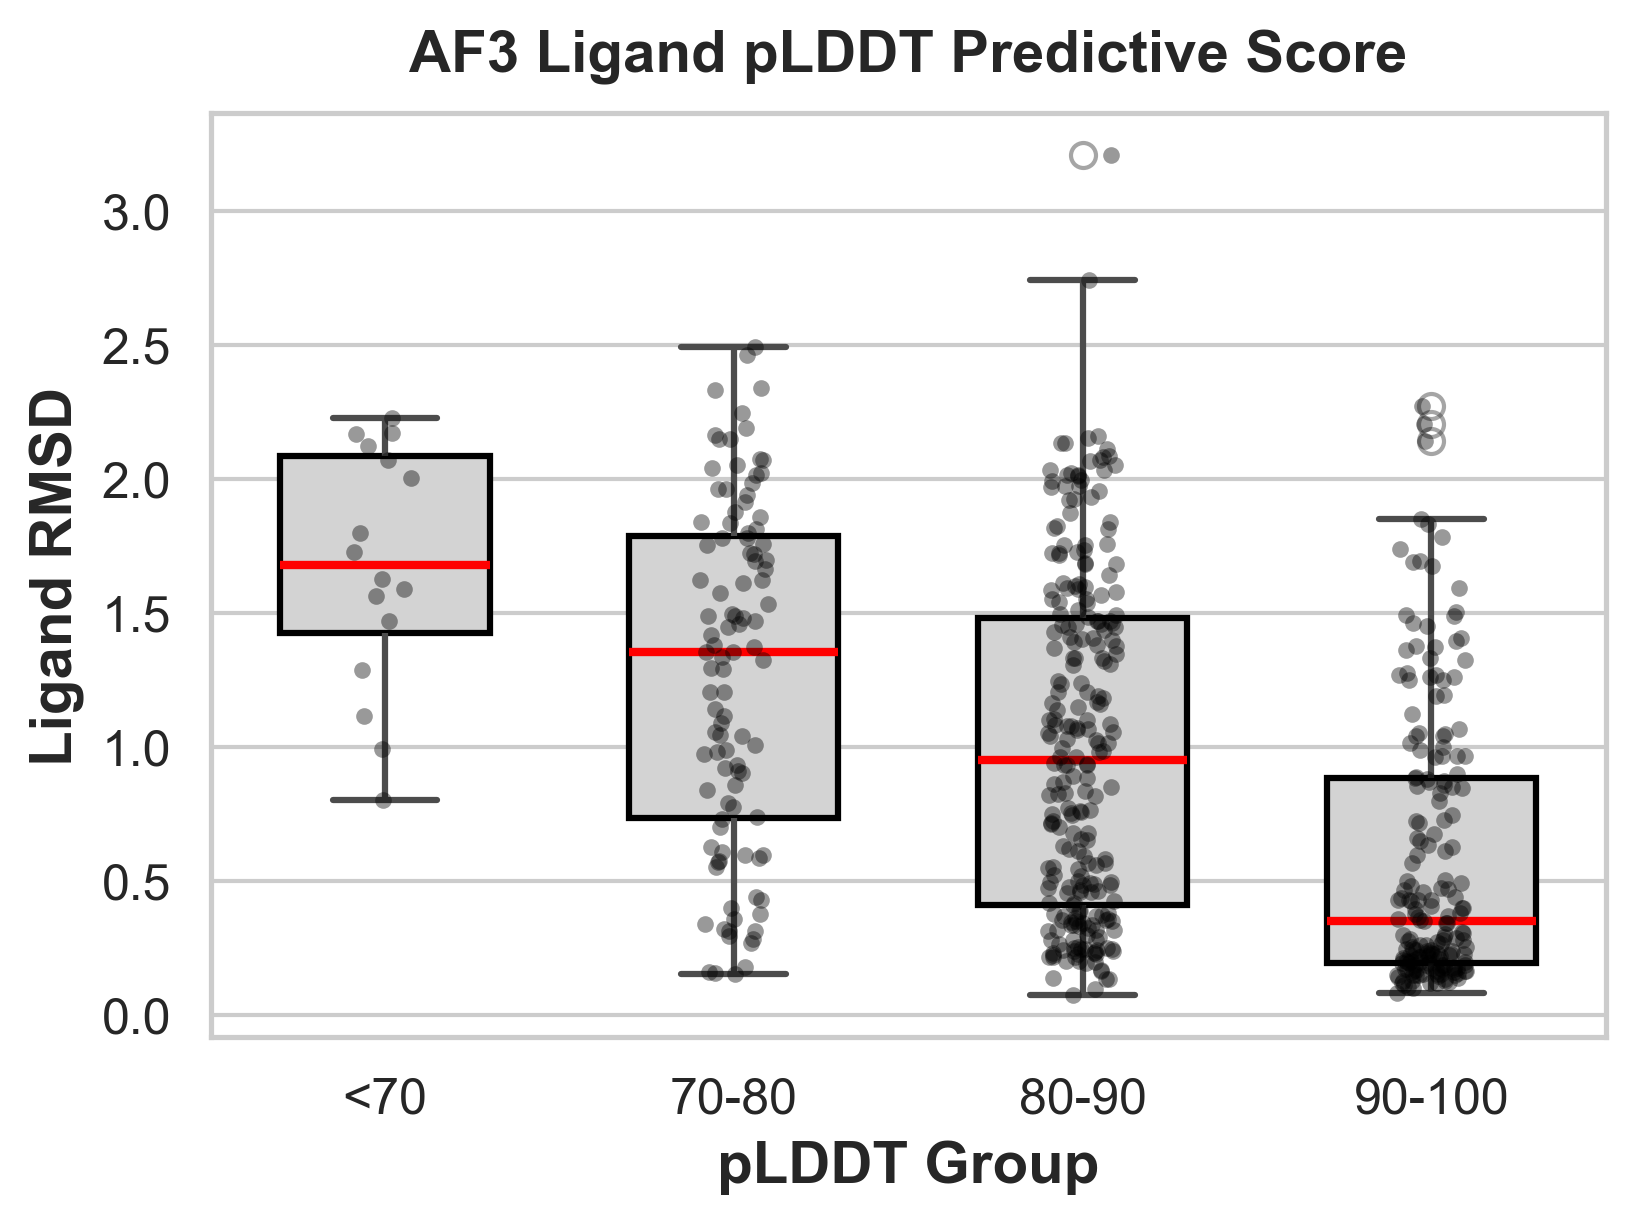

In [74]:
#Load file (Change the file_path to your own xlsx/csv file)
file_path = "/Users/JB/Rotation_bkslab/250203_alphafold3/20241209_mac1.xlsx"
data = pd.read_excel(file_path)

#Define bins and labels (set up appropriate bins for your box plot)
bins = [0, 70, 80, 90, 100]
labels = ["<70", "70-80", "80-90", "90-100"]

# Extract data (14th column is Ligand pLDDT, 13th column is Ligand RMSD)
x = data.iloc[:, 13]  
y = data.iloc[:, 12]

# Create DataFrame
df = pd.DataFrame({"L-pLDDT": x, "Ligand RMSD": y})
df.dropna(inplace=True)

# Assign each pLDDT value to a bin
df["pLDDT Group"] = pd.cut(df["L-pLDDT"], bins=bins, labels=labels, include_lowest=True)

# Count number of data points in each bin
bin_counts = df["pLDDT Group"].value_counts().sort_index()
stats = df.groupby("pLDDT Group")["Ligand RMSD"].agg(["mean", "std"])

# Print results
print("Number of data points in each pLDDT bin:")
print(bin_counts)
print(stats)

# Pearson's
corr_coeff, p_value = pearsonr(df["L-pLDDT"], df["Ligand RMSD"])

# Print correlation results
print(f"Pearson Correlation Coefficient: {corr_coeff:.3f}")
print(f"P-value: {p_value:.3e}")

# Adding aesthetics to the plot
sns.set(style="whitegrid", context="notebook")
plt.figure(figsize=(6, 4), dpi=300)  # High-resolution figure for publication

# Box plots
sns.boxplot(x="pLDDT Group", y="Ligand RMSD", data=df,  
            width=0.6, linewidth=1.5,  
            boxprops={'facecolor': 'lightgray', 'edgecolor': 'black'}, 
            whiskerprops={'linewidth': 1.5}, capprops={'linewidth': 1.5}, 
            medianprops={'color': 'red', 'linewidth': 2}, flierprops={'marker': 'o', 'alpha': 0.5})

# Individual points are overlayed on plots
sns.stripplot(x="pLDDT Group", y="Ligand RMSD", data=df,  
              jitter=True, size=4, color="black", alpha=0.4)

# Axes, labels, etc.
plt.xlabel("pLDDT Group", fontsize=14, fontweight='bold', fontname='Arial')
plt.ylabel("Ligand RMSD", fontsize=14, fontweight='bold', fontname='Arial')
plt.title("AF3 Ligand pLDDT Predictive Score", fontsize=14, fontweight='bold', fontname='Arial', pad=10)
plt.xticks(fontsize=12, fontname='Arial')
plt.yticks(fontsize=12, fontname='Arial')

/var/folders/6v/7hycfbhs6fg9jp_q0z6h9flm0000gp/T/ipykernel_8275/3215074800.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df.groupby("pLDDT Group")["Ligand RMSD"].agg(["mean", "std"])


Number of data points in each pLDDT bin:
pLDDT Group
<70        16
70-80     104
80-90     244
90-100    193
Name: count, dtype: int64
                 mean       std
pLDDT Group                    
<70          1.670480  0.450001
70-80        1.271799  0.639722
80-90        1.002660  0.630151
90-100       0.581505  0.511484


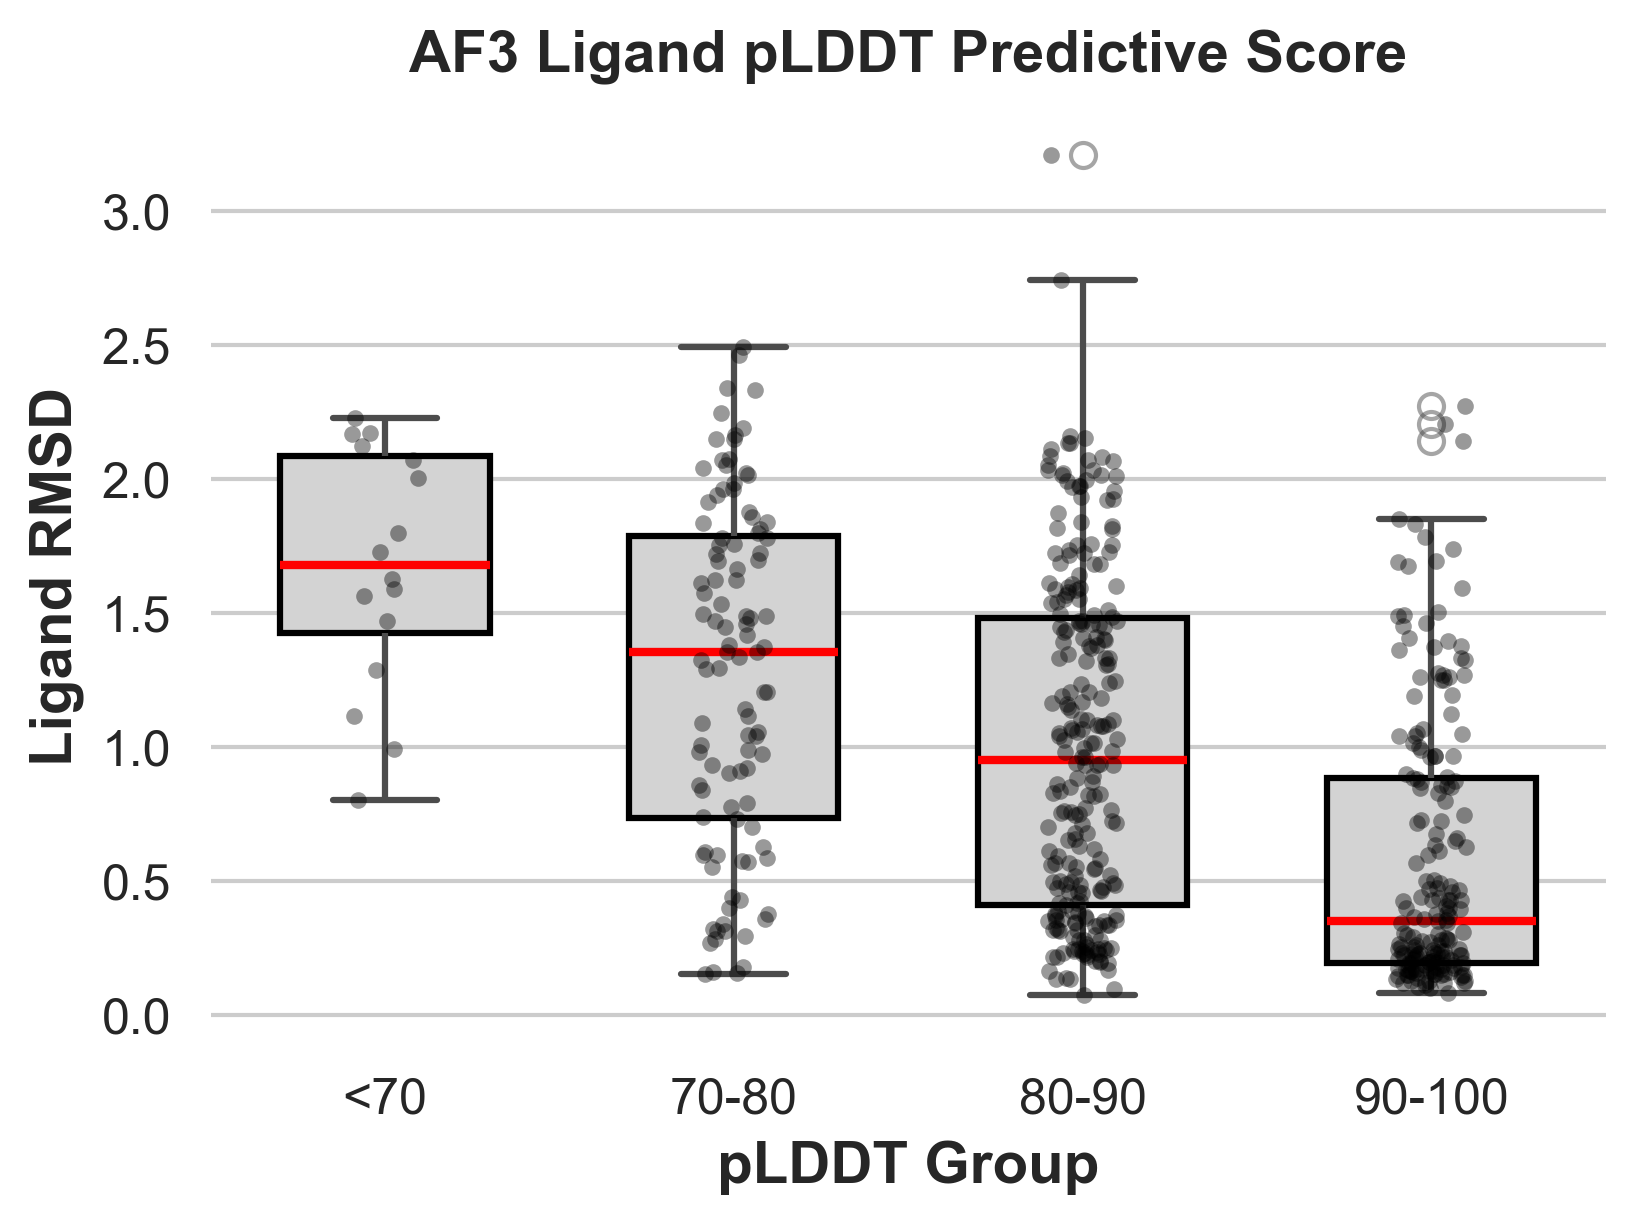

In [45]:
# Define pLDDT bins and labels
bins = [0, 70, 80, 90, 100]
labels = ["<70", "70-80", "80-90", "90-100"]
x = data.iloc[:, 13]  # Assuming 13th column is Ligand pLDDT
y = data.iloc[:, 12]

df = pd.DataFrame({"L-pLDDT": x, "Ligand RMSD": y})

# Assign each pLDDT value to a bin
df["pLDDT Group"] = pd.cut(df["L-pLDDT"], bins=bins, labels=labels, include_lowest=True)

# Count number of data points in each bin
bin_counts = df["pLDDT Group"].value_counts().sort_index()
stats = df.groupby("pLDDT Group")["Ligand RMSD"].agg(["mean", "std"])

# Print results
print("Number of data points in each pLDDT bin:")
print(bin_counts)
print(stats)

# Set **Nature-style** aesthetics
sns.set(style="whitegrid", context="notebook")  # Clean and professional background
plt.figure(figsize=(6, 4), dpi=300)  # High-resolution figure for publication

# Create **box plot** with refined styling
sns.boxplot(x="pLDDT Group", y="Ligand RMSD", data=df,  
            width=0.6, linewidth=1.5,  
            boxprops={'facecolor': 'lightgray', 'edgecolor': 'black'}, 
            whiskerprops={'linewidth': 1.5}, capprops={'linewidth': 1.5}, 
            medianprops={'color': 'red', 'linewidth': 2}, flierprops={'marker': 'o', 'alpha': 0.5})

# Overlay **individual data points** using a strip plot
sns.stripplot(x="pLDDT Group", y="Ligand RMSD", data=df,  
              jitter=True, size=4, color="black", alpha=0.4)

# Customize **axes and labels for a clean, professional look**
plt.xlabel("pLDDT Group", fontsize=14, fontweight='bold', fontname='Arial')
plt.ylabel("Ligand RMSD", fontsize=14, fontweight='bold', fontname='Arial')
plt.title("AF3 Ligand pLDDT Predictive Score", fontsize=14, fontweight='bold', fontname='Arial', pad=10)
plt.xticks(fontsize=12, fontname='Arial')
plt.yticks(fontsize=12, fontname='Arial')

# Remove unnecessary box and border elements
sns.despine(trim=True, left=True, bottom=True)

# Save figure as **high-quality publication format**
plt.savefig("AF3_Ligand_pLDDT_BoxPlot.svg", format="svg", dpi=300, bbox_inches='tight')  # Vector format
plt.savefig("AF3_Ligand_pLDDT_BoxPlot.png", format="png", dpi=600, bbox_inches='tight')  # High-resolution PNG

# Show final **Nature-style** figure
plt.show()

/var/folders/6v/7hycfbhs6fg9jp_q0z6h9flm0000gp/T/ipykernel_8275/649709306.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False, fontsize=12, loc='upper right')


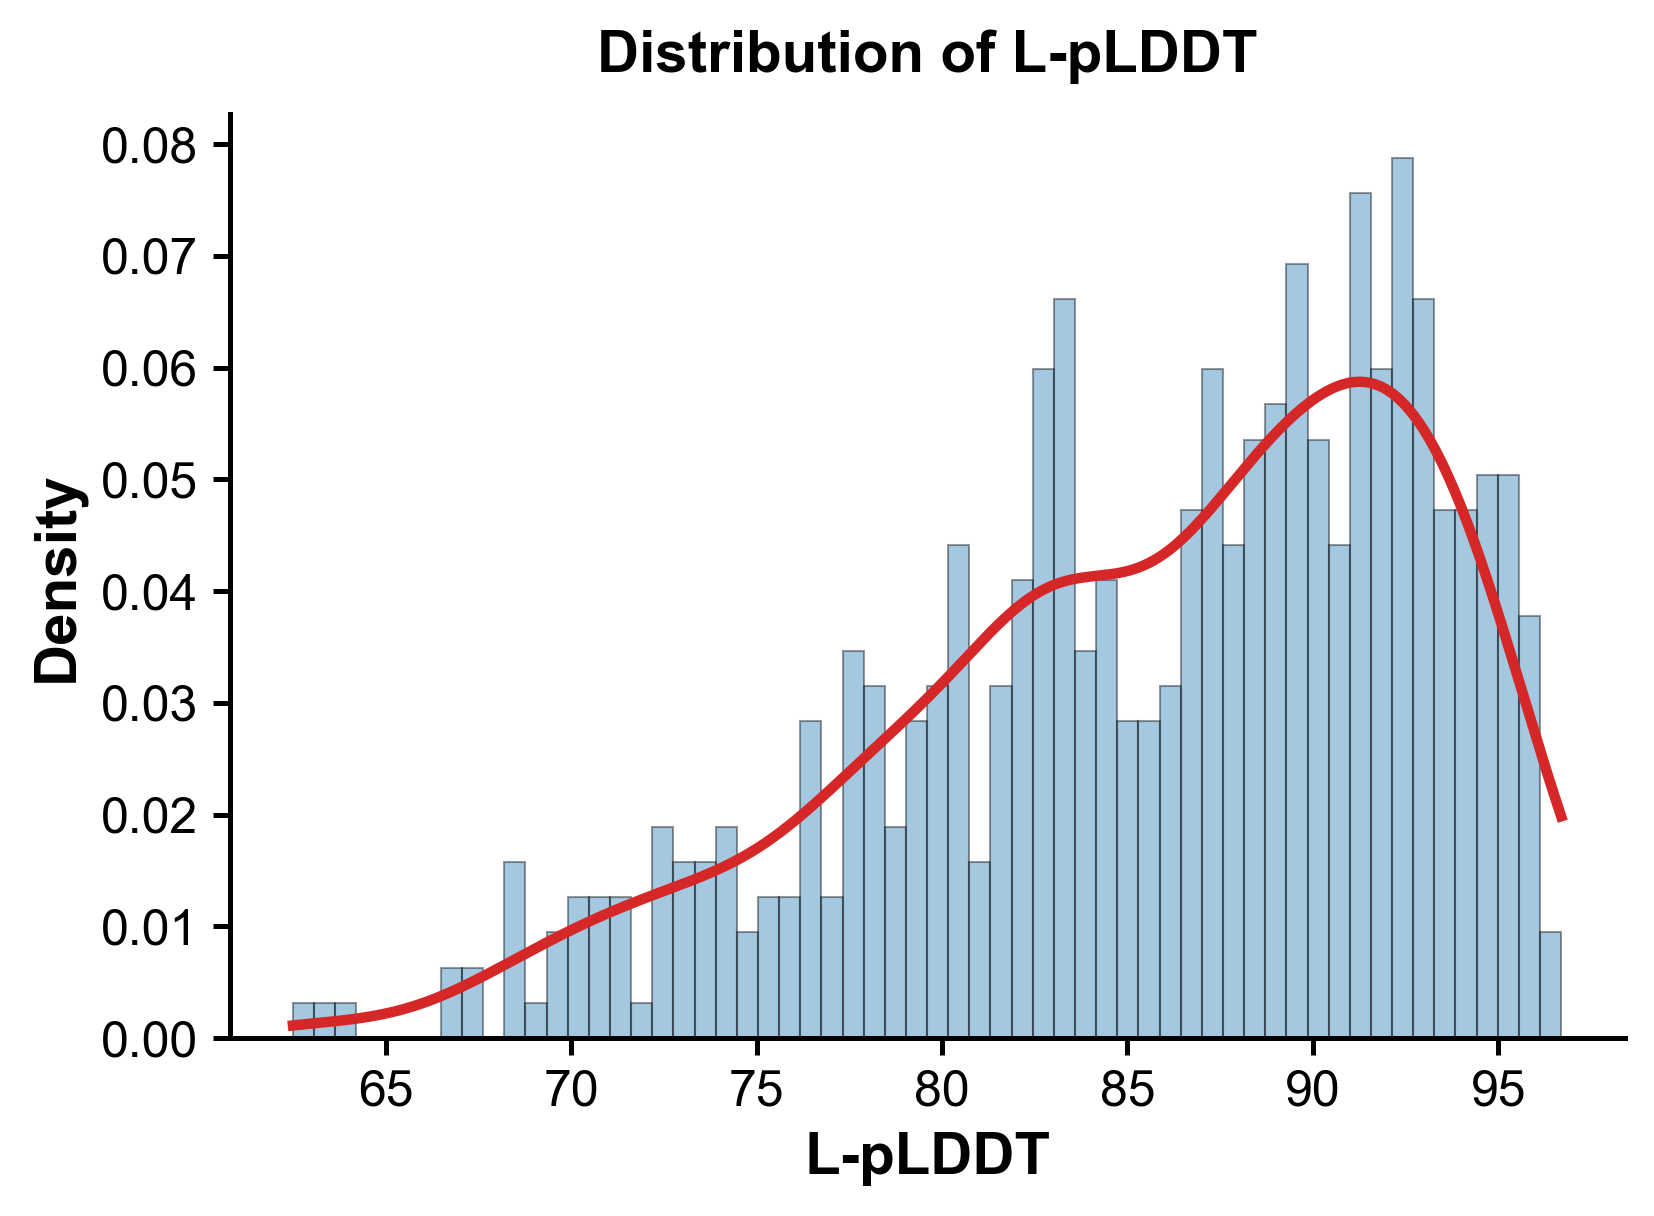

In [43]:
# Load Excel file (Replace with your actual path)
file_path = "/Users/JB/Rotation_bkslab/250203_alphafold3/20241209_mac1.xlsx"  # Replace with your file path
data = pd.read_excel(file_path)

# Extract L-pLDDT values
x = data.iloc[:, 13].dropna()  # Assuming the 13th column contains L-pLDDT values

plt.figure(figsize=(6, 4), dpi=300)  # High-resolution for publication

# Create histogram with **clean and aesthetic styling**
plt.hist(x, bins=60, density=True, alpha=0.4, color='#1f77b4', edgecolor='black', linewidth=0.5, label="")

# Kernel Density Estimation (KDE) for smooth curve
kde = gaussian_kde(x)
x_vals = np.linspace(min(x), max(x), 500)  # Generate points for smooth line
kde_vals = kde(x_vals)

# Plot **estimated distribution curve**
plt.plot(x_vals, kde_vals, color='#d62728', linewidth=2.5, linestyle='-', label="")

# **Nature-style figure formatting**
plt.xlabel('L-pLDDT', fontsize=14, fontweight='bold', fontname='Arial')
plt.ylabel('Density', fontsize=14, fontweight='bold', fontname='Arial')
plt.title('Distribution of L-pLDDT', fontsize=14, fontweight='bold', fontname='Arial', pad=10)
plt.xticks(fontsize=12, fontname='Arial')
plt.yticks(fontsize=12, fontname='Arial')

# Remove unnecessary borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1.2)
plt.gca().spines['bottom'].set_linewidth(1.2)

# Adjust tick parameters for a cleaner look
plt.tick_params(axis='both', direction='out', length=4, width=1.2)

# Add **legend** with professional styling
plt.legend(frameon=False, fontsize=12, loc='upper right')

# Save figure as **high-quality** output
plt.savefig("L-pLDDT_Distribution.svg", format="svg", dpi=300, bbox_inches='tight')  # Vector format for Nature submission
plt.savefig("L-pLDDT_Distribution.png", format="png", dpi=600, bbox_inches='tight')  # High-res PNG

# Show final publication-style plot
plt.show()

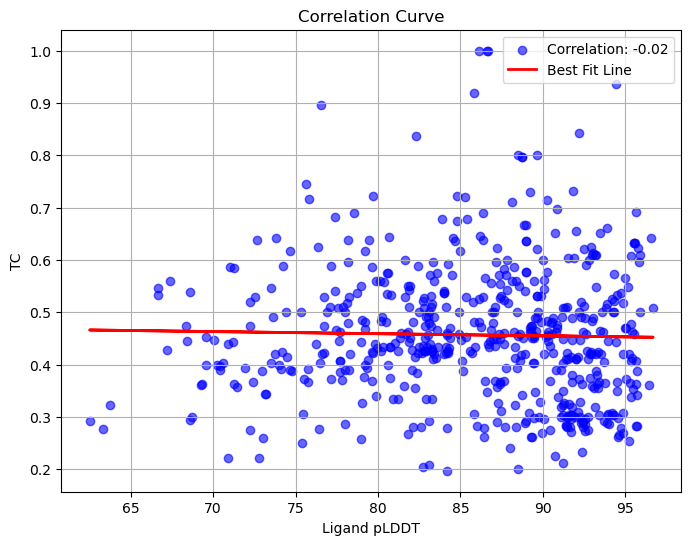

In [63]:

#Load data
file_path = "/Users/JB/Rotation_bkslab/250203_alphafold3/20241209_mac1.xlsx"
data = pd.read_excel(file_path)

# Extract x and y columns
y = data.iloc[:, 4]  # Assuming the 5th column is Y
x = data.iloc[:, 12]  # Assuming the 13th column is X

# Remove NaN or infinite values
df_clean = pd.DataFrame({'x': x, 'y': y}).dropna()  # Drop NaNs
df_clean = df_clean[np.isfinite(df_clean).all(1)]  # Drop infinite values

# Extract cleaned x and y
x_clean = df_clean['x']
y_clean = df_clean['y']

# Calculate the correlation coefficient
if len(x_clean) > 1:  # Ensure there's enough data for correlation
    correlation_coefficient = np.corrcoef(x_clean, y_clean)[0, 1]
else:
    correlation_coefficient = float('nan')  # If not enough data, return NaN

# Compute the best-fit line (linear regression)
if len(x_clean) > 1:
    slope, intercept = np.polyfit(x_clean, y_clean, 1)
    best_fit_line = slope * x_clean + intercept

    # Plot scatter plot with best-fit line
    plt.figure(figsize=(8, 6))
    plt.scatter(x_clean, y_clean, color='blue', alpha=0.6, label=f'Correlation: {correlation_coefficient:.2f}')
    plt.plot(x_clean, best_fit_line, color='red', linewidth=2, label='Best Fit Line')  # Trendline
else:
    plt.figure(figsize=(8, 6))
    plt.scatter(x_clean, y_clean, color='blue', alpha=0.6, label='Not enough data')

# Labels, limits, and legend
plt.title('Correlation Curve')
plt.xlabel('Ligand pLDDT')
plt.ylabel('TC')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

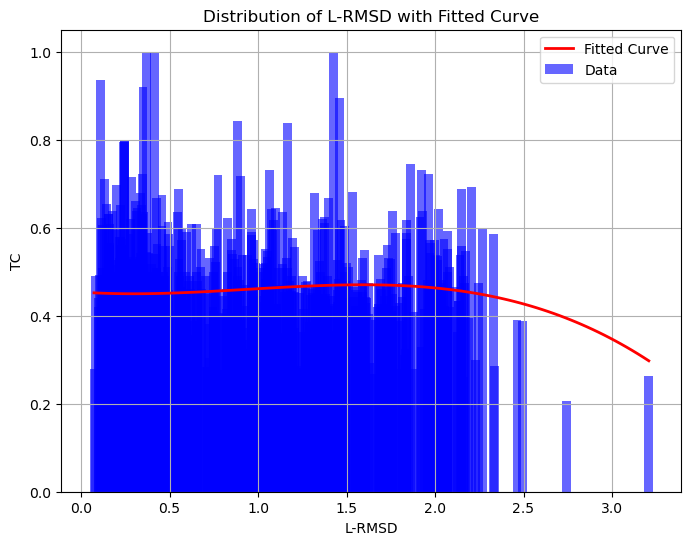

In [82]:

file_path = "/Users/JB/Rotation_bkslab/250203_alphafold3/20241209_mac1.xlsx"
data = pd.read_excel(file_path)

# Extract x and y columns
x = data.iloc[:, 11]  # Assuming the 13th column is X
y = data.iloc[:, 4]   # Assuming the 5th column is Y

# Remove NaN values for clean analysis
df_clean = pd.DataFrame({'x': x, 'y': y}).dropna()
x_clean = df_clean['x']
y_clean = df_clean['y']

# Sort x values for a smooth curve
sorted_indices = np.argsort(x_clean)
x_sorted = x_clean.iloc[sorted_indices]
y_sorted = y_clean.iloc[sorted_indices]

# Fit a polynomial curve (degree = 3 for smooth fit)
coeffs = np.polyfit(x_sorted, y_sorted, deg=3)  # Change degree if needed
poly_fit = np.poly1d(coeffs)

# Generate curve values
x_curve = np.linspace(min(x_sorted), max(x_sorted), 100)
y_curve = poly_fit(x_curve)

# Plot original data (bar chart)
plt.figure(figsize=(8, 6))
plt.bar(x_clean, y_clean, width=0.05, alpha=0.6, color='blue', label='Data')

# Plot the fitted curve
plt.plot(x_curve, y_curve, color='red', linewidth=2, label='Fitted Curve')

# Labels and title
plt.xlabel('L-RMSD')
plt.ylabel('TC')
plt.title('Distribution of L-RMSD with Fitted Curve')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

Number of data points in each pLDDT bin:
pLDDT Group
<70        16
70-80     104
80-90     244
90-100    193
Name: count, dtype: int64


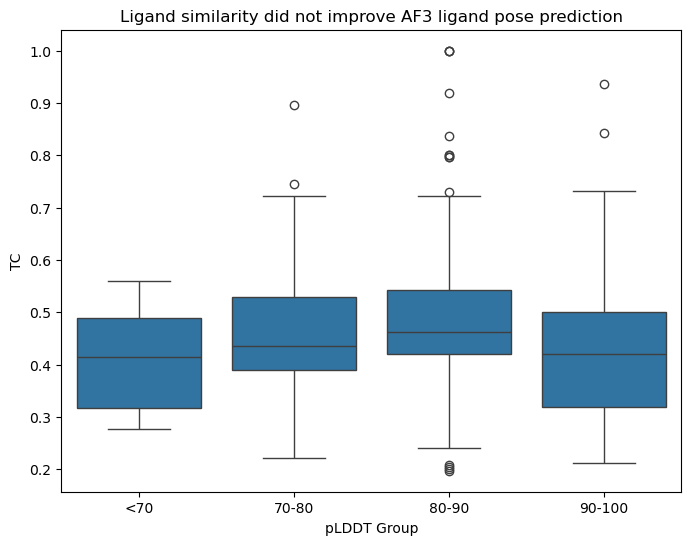

In [89]:
# Define pLDDT bins and labels
bins = [0, 70, 80, 90, 100]
labels = ["<70", "70-80", "80-90", "90-100"]

x = data.iloc[:, 12]  # Assuming the 11th column is X
y = data.iloc[:, 4]  # Assuming the 10th column is Y

df = pd.DataFrame({"L-pLDDT": x, "Ligand similarity": y})

# Assign each pLDDT value to a bin
df["pLDDT Group"] = pd.cut(df["L-pLDDT"], bins=bins, labels=labels, include_lowest=True)

# Count number of data points in each bin
bin_counts = df["pLDDT Group"].value_counts().sort_index()

# Print results
print("Number of data points in each pLDDT bin:")
print(bin_counts)

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x="pLDDT Group", y="Ligand similarity", data=df)

# Add labels and title
plt.xlabel("pLDDT Group")
plt.ylabel("TC")
plt.title("Ligand similarity did not improve AF3 ligand pose prediction")

# Show plot
plt.show()

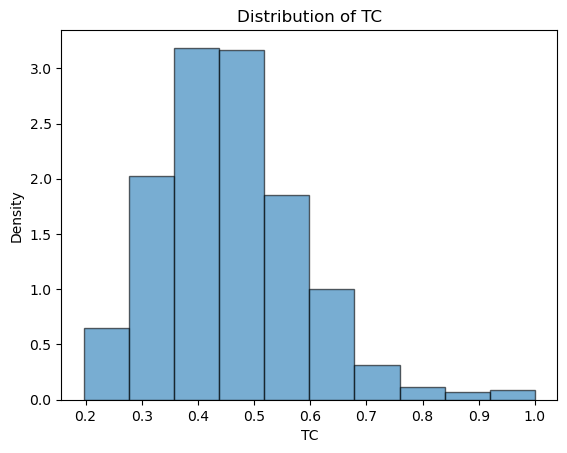

In [92]:
# Generate random data
file_path = "/Users/JB/Rotation_bkslab/250203_alphafold3/20241209_mac1.xlsx"  # Replace with the path to your Excel file
data = pd.read_excel(file_path)
x = data.iloc[:, 4]  # Assuming the 11th column is X

# Create histogram with many bins
plt.hist(x, bins=10, density=True, alpha=0.6, edgecolor='black')  # High bin count, density=True for probability distribution

# Labels and title
plt.xlabel('TC')
plt.ylabel('Density')
plt.title('Distribution of TC')

# Show plot
plt.show()

In [55]:
# Load Excel file
file_path = "/Users/JB/Rotation_bkslab/250203_alphafold3/20241209_mac1.xlsx"
data = pd.read_excel(file_path)

# Extract x (L-pLDDT) and y (IC50)
x = data.iloc[:, 22].astype(str)  # Convert to string for processing
y = data.iloc[:, 13]

# Ensure data is numeric and drop NaN values
df = pd.DataFrame({"IC50": x, "L-pLDDT": y, "Target":z}).dropna()

# Remove ">" sign if present and convert to float
df["IC50"] = df["IC50"].str.replace(">", "").astype(float)

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(df["L-pLDDT"], df["IC50"])[0, 1]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df["IC50"], df["L-pLDDT"], color='blue', alpha=0.5, label=f'All Data (Correlation: {correlation_coefficient:.2f})')

# Add labels and title
plt.title("%Mac1 binding IC50 vs AF3 L-pLDDT")
plt.xlabel("IC50 (uM)")
plt.ylabel("L-pLDDT")
plt.legend()

# Show grid
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()

KeyError: 'Target'

Total data points after filtering: 190

IC50 Group distribution:
IC50 Group
10 - 100     83
1 - 10       51
0 - 1        25
 > 500       16
100 - 500    15
Name: count, dtype: int64

Pearson Correlation Coefficient: -0.437, P-value: 2.799e-10

L-pLDDT Statistics by IC50 Group:
                 mean       std
IC50 Group                     
0 - 1       93.733098  2.011154
1 - 10      91.535185  4.169752
10 - 100    88.949288  5.197076
100 - 500   88.631666  4.252268
 > 500      82.845684  6.154392


/var/folders/6v/7hycfbhs6fg9jp_q0z6h9flm0000gp/T/ipykernel_8275/3759267710.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df.groupby("IC50 Group")["L-pLDDT"].agg(["mean", "std"])


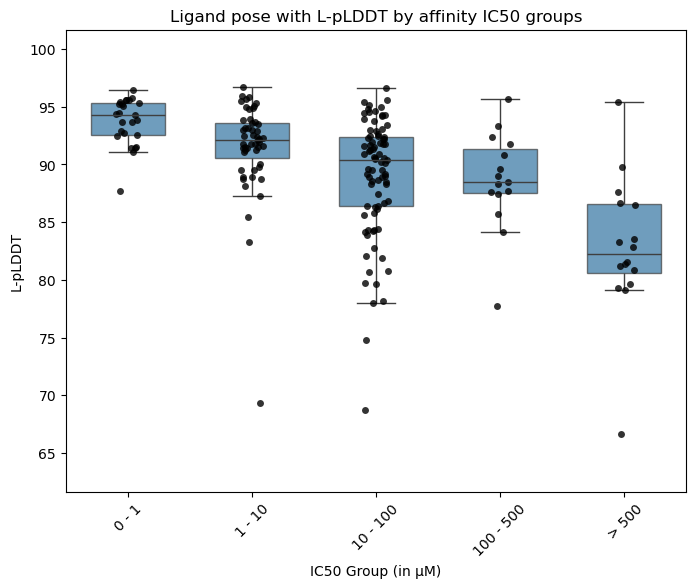

In [25]:
# Load data
file_path = "/Users/JB/Rotation_bkslab/ampC_sigma_af_output/ligand_plddt.xlsx"
data = pd.read_excel(file_path)

# Define bins
bins = [0, 1, 10, 100, 500, float("inf")]
labels = ["0 - 1", "1 - 10", "10 - 100", "100 - 500", " > 500"]

# Extract and process data
x = data.iloc[:, 9]  # Convert to string for processing
y = data.iloc[:, 12]
category = data.iloc[:, 0].astype(str)

# Ensure valid numeric data
df = pd.DataFrame({"IC50": x, "L-pLDDT": y, "Target": category}).dropna()
df["IC50"] = df["IC50"].astype(str).str.replace(">", "").str.strip()  # Clean ">"

# Ensure only numeric values
df["IC50"] = df["IC50"].apply(lambda v: v.replace(">", "").strip())  # Clean ">" and strip spaces

# Convert to numeric, allowing scientific notation
df["IC50"] = pd.to_numeric(df["IC50"], errors="coerce")

# Drop NaNs to remove any invalid values
df = df.dropna(subset=["IC50"])

df["IC50"] = df["IC50"].astype(float)
df["Target"] = df["Target"].str.strip().str.lower()
df = df[df["Target"] == "mac1"]

# Remove zero and invalid values
df = df[df["IC50"] > 0]

# Assign IC50 values to bins
df["IC50 Group"] = pd.cut(df["IC50"], bins=bins, labels=labels, include_lowest=True)

# Ensure numeric L-pLDDT
df["L-pLDDT"] = pd.to_numeric(df["L-pLDDT"], errors="coerce")
df = df.dropna()  # Remove invalid entries

# Debugging: Print dataset size and binning results
print(f"Total data points after filtering: {len(df)}")
print("\nIC50 Group distribution:")
print(df["IC50 Group"].value_counts())

# Compute Pearson correlation
if len(df) >= 2:
    corr_coeff, p_value = pearsonr(df["IC50"], df["L-pLDDT"])
    print(f"\nPearson Correlation Coefficient: {corr_coeff:.3f}, P-value: {p_value:.3e}")
else:
    print("\nNot enough data for correlation calculation.")

# Compute statistics
stats = df.groupby("IC50 Group")["L-pLDDT"].agg(["mean", "std"])
print("\nL-pLDDT Statistics by IC50 Group:")
print(stats)

# Plot
plt.figure(figsize=(8, 6))

# Box plot first (lower z-order)
sns.boxplot(x="IC50 Group", y="L-pLDDT", data=df, showfliers=False, width=0.6, boxprops=dict(alpha=0.7))

# Strip plot second (higher z-order)
sns.stripplot(x="IC50 Group", y="L-pLDDT", data=df, jitter=True, size=5, alpha=0.8, color="black", zorder=2)

# Labels and title
plt.xlabel("IC50 Group (in µM)")
plt.ylabel("L-pLDDT")
plt.title("Ligand pose with L-pLDDT by affinity IC50 groups")
plt.xticks(rotation=45)

# Ensure points are within the visible range
plt.ylim(df["L-pLDDT"].min() - 5, df["L-pLDDT"].max() + 5)

# Show plot
plt.show()

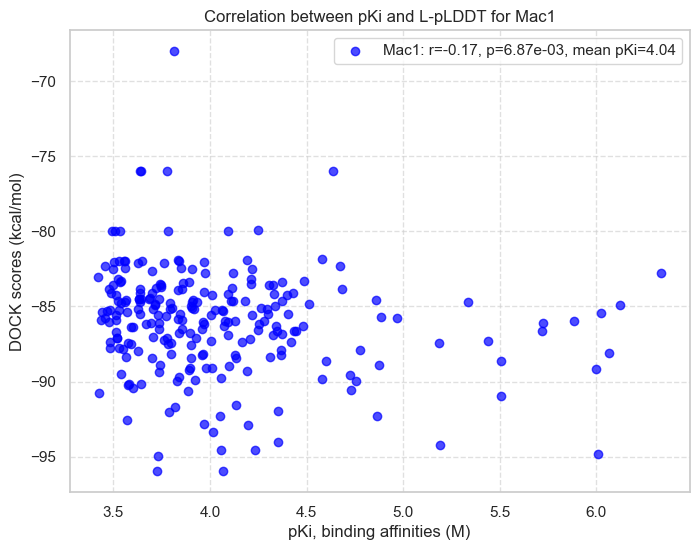


Mac1 Pearson Correlation and Mean pKi:
Pearson r = -0.174, p-value = 6.87e-03, Mean pKi = 4.04


In [66]:
# Load data
file_path = "/Users/JB/Rotation_bkslab/ampC_sigma_af_output/ligand_plddt.xlsx"
data = pd.read_excel(file_path)

# Extract IC50, L-pLDDT, and Target columns
x = data.iloc[:, 9]  # IC50 values
y = data.iloc[:, 5]  # L-pLDDT values
category = data.iloc[:, 0].astype(str)  # Target category

# Create DataFrame
df = pd.DataFrame({"IC50": x, "L-pLDDT": y, "Target": category}).dropna()

# Filter for "Mac1" target only
df = df[df["Target"] == "AmpC"].copy()

# Clean IC50 column (remove ">" signs and spaces)
df["IC50"] = df["IC50"].astype(str).str.replace(">", "").str.strip()

# Convert IC50 to numeric, allowing scientific notation
df["IC50"] = pd.to_numeric(df["IC50"], errors="coerce")

# Remove invalid or zero IC50 values (since log(0) is undefined)
df = df[df["IC50"] > 0].copy()

# Compute pKi (-log10(IC50))
df["pKi"] = -np.log10(df["IC50"] * 1e-6)

# Convert L-pLDDT to numeric and drop invalid rows
df["L-pLDDT"] = pd.to_numeric(df["L-pLDDT"], errors="coerce")
df = df.dropna()  # Ensure valid data

# Compute Pearson correlation for Mac1 (if at least 2 data points exist)
if len(df) >= 2:
    r, p = pearsonr(df["pKi"], df["L-pLDDT"])
else:
    r, p = float("nan"), float("nan")

# Compute mean pKi
avg_pKi = df["pKi"].mean() if len(df) > 0 else float("nan")

# Scatter plot for Mac1
plt.figure(figsize=(8, 6))
plt.scatter(df["pKi"], df["L-pLDDT"], color="blue", alpha=0.7, label=f"Mac1: r={r:.2f}, p={p:.2e}, mean pKi={avg_pKi:.2f}")

# Labels and title
plt.xlabel("pKi, binding affinities (M)")
plt.ylabel("DOCK scores (kcal/mol)")
plt.title("Correlation between pKi and L-pLDDT for Mac1")

# Show grid and legend
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

# Print Pearson correlation and mean pKi
print("\nMac1 Pearson Correlation and Mean pKi:")
print(f"Pearson r = {r:.3f}, p-value = {p:.2e}, Mean pKi = {avg_pKi:.2f}")

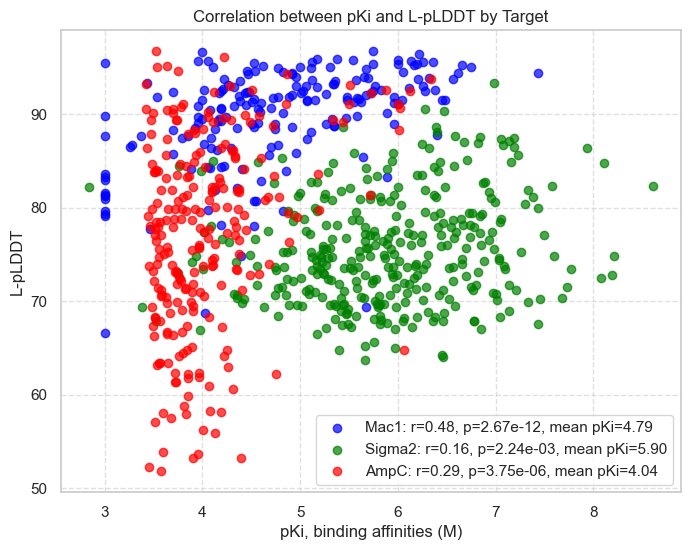

Pearson Correlation and Mean pKi by Target:
Mac1: Pearson r = 0.48, p = 2.67e-12, Mean pKi = 4.79
Sigma2: Pearson r = 0.16, p = 2.24e-03, Mean pKi = 5.90
AmpC: Pearson r = 0.29, p = 3.75e-06, Mean pKi = 4.04


In [68]:
# Load data
file_path = "/Users/JB/Rotation_bkslab/ampC_sigma_af_output/ligand_plddt.xlsx"
data = pd.read_excel(file_path)

# Extract IC50, L-pLDDT, and Target columns
x = data.iloc[:, 9]  # IC50 values
y = data.iloc[:, 13]  # L-pLDDT values
category = data.iloc[:, 0].astype(str)  # Target category

# Create DataFrame
df = pd.DataFrame({"IC50": x, "L-pLDDT": y, "Target": category}).dropna()
# Clean IC50 column (remove ">" signs and spaces)
df["IC50"] = df["IC50"].astype(str).str.replace(">", "").str.strip()

# Convert IC50 to numeric, allowing scientific notation
df["IC50"] = pd.to_numeric(df["IC50"], errors="coerce")

# Remove invalid or zero IC50 values (since log(0) is undefined)
df = df[df["IC50"] > 0]

# Compute pKi (-log10(IC50))
df["pKi"] = -np.log10(df["IC50"]*(1e-6))

# Convert L-pLDDT to numeric and drop invalid rows
df["L-pLDDT"] = pd.to_numeric(df["L-pLDDT"], errors="coerce")
df = df.dropna()  # Ensure valid data

# Define color mapping for targets
target_colors = {"Mac1": "blue", "Sigma2": "green", "AmpC": "red"}

# Initialize dictionaries to store Pearson correlation and average pKi results
correlation_results = {}
avg_pKi_results = {}

plt.figure(figsize=(8, 6))

# Loop through each target group
for target, color in target_colors.items():
    group_df = df[df["Target"] == target]
    
    # Calculate Pearson correlation if enough data points exist
    if len(group_df) >= 2:
        r, p = pearsonr(group_df["pKi"], group_df["L-pLDDT"])
    else:
        r, p = float("nan"), float("nan")
    correlation_results[target] = (r, p)
    
    # Calculate average pKi for this target group
    avg_pKi = group_df["pKi"].mean() if len(group_df) > 0 else float("nan")
    avg_pKi_results[target] = avg_pKi
    
    # Scatter plot for this group with label including correlation and average pKi
    plt.scatter(group_df["pKi"], group_df["L-pLDDT"], alpha=0.7,
                color=color,
                label=f"{target}: r={r:.2f}, p={p:.2e}, mean pKi={avg_pKi:.2f}")

# Labels and title
plt.xlabel("pKi, binding affinities (M)")
plt.ylabel("L-pLDDT")
plt.title("Correlation between pKi and L-pLDDT by Target")

# Show grid and legend
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

# Print Pearson correlation and average pKi results for each target group
print("Pearson Correlation and Mean pKi by Target:")
for target in target_colors.keys():
    r, p = correlation_results[target]
    mean_pKi = avg_pKi_results[target]
    print(f"{target}: Pearson r = {r:.2f}, p = {p:.2e}, Mean pKi = {mean_pKi:.2f}")